Zbudować autoenkoder wykorzystując zbiór CIFAR10

1. Podzielić zbiór na ciąg trenujący i uczący w proporcjach: 50000, 10000 domyślne wartości w przypadku wykorzystania funkcji bibliotecznej  z pakietu tensorflow.keras.datasets.cifar10.load_data()
2. Zwizualizować 10-25 przykładów ze zbioru 
3. Wytrenować autoenkoder w wykorzystaniem   warstw  Dense (bez użycia warstw splotowych)
    - warstwa kodująca powinna składać się z 512 neuronów.
    - baseline: dwie wartswy gęste + kodująca (2048,1024, 512 neuronów), funkcje aktywacji ReLU, wyjście z ostatniej warstwy sigmoid. 
    - funkcja straty: błąd średniokowadratowy, optimizer SGD
    - liczba epok uczenia: 100, batch_size= 1024 
    - Wytrenować autoenkoder w wykorzystaniem   warstw  Dense (bez użycia warstw splotowych)
4. Skomentować przebieg procesu uczenia na podstawie metryk na zbiorze uczącym i testowym w kolejnych epokach uczenia (można zwizualizować). Czy nastąpił overfitting / underfitting ? 
5. Zwizualizować 10-25 przykładów  obraz wejściowy - rekonstrukcja 
6. Zbudować prosty klasyfikator wykorzystujący:
    - warstwę enkodującą do transformacji wejścia do wektora o rozmiarze 512 (ta warstwa nie będzie zmieniana podczas uczenia) 
    - dwie warstwy gęste: ostatnia z funkcją aktywacji softmax 
optimizer SGD, funkcja straty: CategoricalCrossentropy
Zbadać metrykę accuracy na zbiorze testowym  (ile obrazów zostało poprawnie zaklasyfikowanych) 


In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

In [3]:
training_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [4]:
print("Data proportions:")
print(f"Training samples: {len(training_data)}")
print(f"Testing samples: {len(test_data)}")


Data proportions:
Training samples: 50000
Testing samples: 10000


In [5]:
# CIFAR10 classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

2. Zwizualizować 10-25 przykładów ze zbioru 

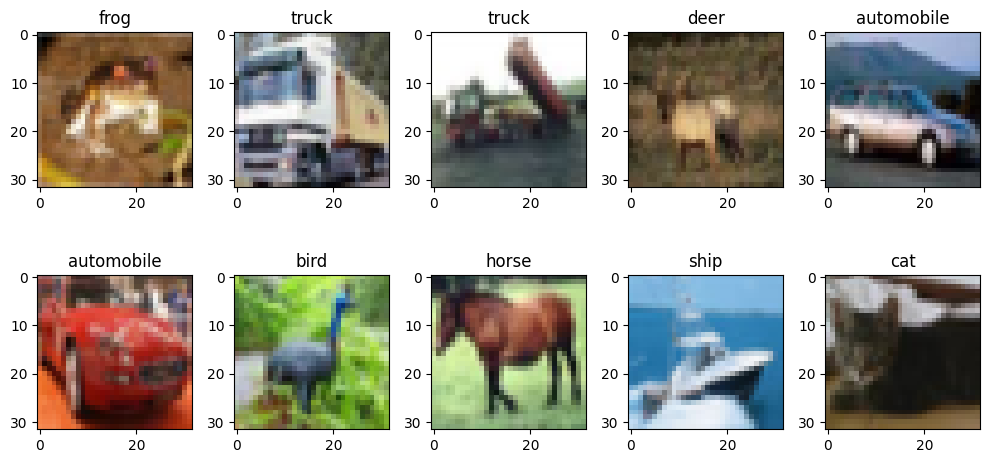

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))

for i in range(10):
    img, label = training_data[i]
    ax = fig.add_subplot(2, 5, i + 1)
    # [C,H,W] -> [H,W,C]
    plt.imshow(img.permute(1, 2, 0))
    ax.set_title(f"{classes[label]}")

plt.tight_layout()
plt.show()

3. Wytrenować autoenkoder w wykorzystaniem   warstw  Dense (bez użycia warstw splotowych)
    - warstwa kodująca powinna składać się z 512 neuronów.
    - baseline: dwie wartswy gęste + kodująca (2048,1024, 512 neuronów), funkcje aktywacji ReLU, wyjście z ostatniej warstwy sigmoid. 
    - funkcja straty: błąd średniokowadratowy, optimizer SGD
    - liczba epok uczenia: 100, batch_size= 1024 
    - Wytrenować autoenkoder w wykorzystaniem   warstw  Dense (bez użycia warstw splotowych)

    warstwy geste (Dense) - kazdy neuron jest polaczony ze wszystkimi neuronali z poprzedniej warstwy (pytorch nn.Linear)
    nn - modul z torch zawierajacy elementy do budowy sieci neuronowej

In [37]:
from torch import nn, optim

class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(3 * 32 * 32, 2048),
            nn.ReLU(),
            nn.Linear(2048, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 2048),
            nn.ReLU(),
            nn.Linear(2048, 3 * 32 * 32),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [43]:
import torch
loader = torch.utils.data.DataLoader(dataset=training_data, batch_size=1024, shuffle=True)
loss_function = nn.MSELoss()
model = AE()
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

4. Skomentować przebieg procesu uczenia na podstawie metryk na zbiorze uczącym i testowym w kolejnych epokach uczenia (można zwizualizować). Czy nastąpił overfitting / underfitting ? 

Wykres obrazuje jak dla kazdej epoki przebiegal proces uczenia. Jak dla wszystkich batchy z respektywnych zbiorow danych dla kazdej z epok zmieniala sie wartosc straty.
Zobrazownay zostal, proces uczenia. Mozna powiedziec, ze wykres jest odpowiedzia na pytanie:
Jak przebiegalo uczenie, krok po kroku dla kazdej epoki?

Co mozna wyczytac z tego wykresu? - Napewno niepokojace jest otrzymanie stalej straty w epokach testowych.
Jezeli ciagle tracimy tyle samo, to znaczy ze nic sie nie nauczylismy.

Underfitting, czy overfitting w tym przypadku nie wystepuje - wartosci strat sa do siebie zblizone.


Rozwiazaniem tego problemu okazalo sie dodanie momentum, czyli poza uwzglednianiem gradientu, dodatkowo analizujemy poprzednie zmiany wag. Poza otrzymaniem zmian w wartosciach strat w epokach testowych, model przyspieszyl.

Epoch 1/100, Train Loss: 0.063977, Test Loss: 0.063834
Epoch 2/100, Train Loss: 0.063979, Test Loss: 0.063832
Epoch 2/100, Train Loss: 0.063979, Test Loss: 0.063832
Epoch 3/100, Train Loss: 0.063974, Test Loss: 0.063830
Epoch 3/100, Train Loss: 0.063974, Test Loss: 0.063830
Epoch 4/100, Train Loss: 0.063970, Test Loss: 0.063829
Epoch 4/100, Train Loss: 0.063970, Test Loss: 0.063829
Epoch 5/100, Train Loss: 0.063972, Test Loss: 0.063827
Epoch 5/100, Train Loss: 0.063972, Test Loss: 0.063827
Epoch 6/100, Train Loss: 0.063965, Test Loss: 0.063826
Epoch 6/100, Train Loss: 0.063965, Test Loss: 0.063826
Epoch 7/100, Train Loss: 0.063969, Test Loss: 0.063824
Epoch 7/100, Train Loss: 0.063969, Test Loss: 0.063824
Epoch 8/100, Train Loss: 0.063961, Test Loss: 0.063822
Epoch 8/100, Train Loss: 0.063961, Test Loss: 0.063822
Epoch 9/100, Train Loss: 0.063963, Test Loss: 0.063821
Epoch 9/100, Train Loss: 0.063963, Test Loss: 0.063821
Epoch 10/100, Train Loss: 0.063959, Test Loss: 0.063819
Epoch 10/

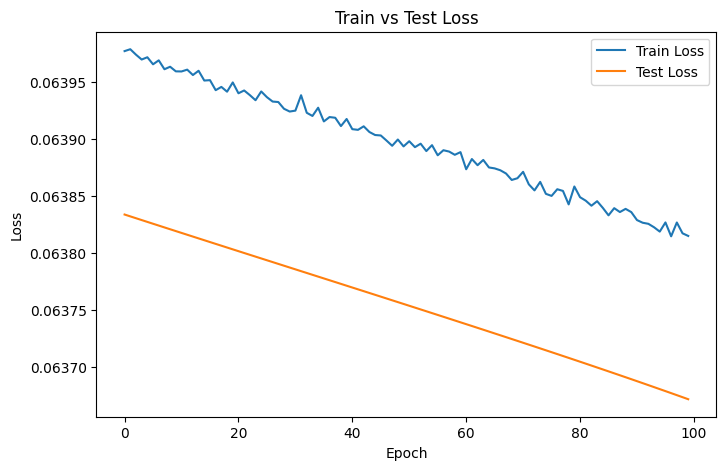

In [44]:
import torch
import matplotlib.pyplot as plt

epochs = 100
batch_size = 1024
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader = torch.utils.data.DataLoader(dataset=training_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)
model.to(device)

train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for images, _ in train_loader:
        images = images.view(-1, 3 * 32 * 32).to(device)
        reconstructed = model(images)
        loss = loss_function(reconstructed, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, _ in test_loader:
            images = images.view(-1, 3 * 32 * 32).to(device)
            reconstructed = model(images)
            loss = loss_function(reconstructed, images)
            test_loss += loss.item()
    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.6f}")

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.show()

5. Zwizualizować 10-25 przykładów  obraz wejściowy - rekonstrukcja 


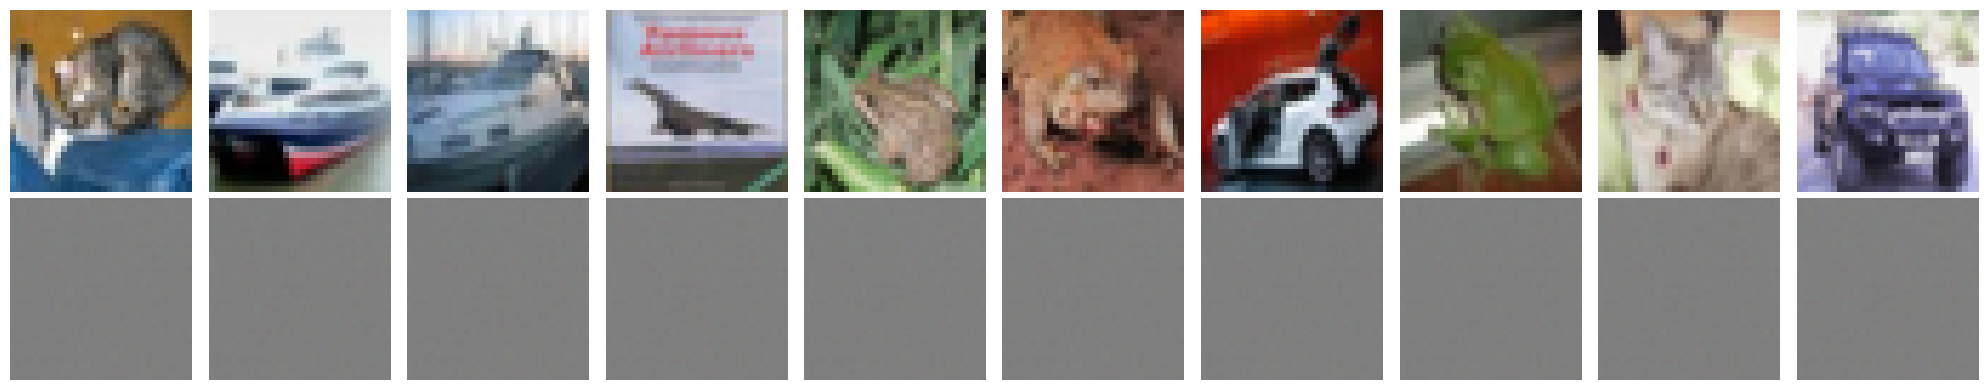

In [20]:
model.eval()
n = 10
test_iter = iter(test_loader)
images, _ = next(test_iter)
images = images[:n].to(device)
with torch.no_grad():
    reconstructed = model(images.view(-1, 3 * 32 * 32))
    reconstructed = reconstructed.view(-1, 3, 32, 32).cpu()

fig, axes = plt.subplots(2, n, figsize=(2 * n, 4))
for i in range(n):
    # Oryginał
    axes[0, i].imshow(images[i].cpu().permute(1, 2, 0))
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_ylabel('Oryginał', fontsize=14)
    # Rekonstrukcja
    axes[1, i].imshow(reconstructed[i].permute(1, 2, 0))
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_ylabel('Rekonstrukcja', fontsize=14)
plt.tight_layout()
plt.show()

Widac problem z naszym modelem, tempo uczenia jest za wolne i nie dostajemy sensownych wynikow. Dlatego zeby poprawic jego dzialanie, testowalam zmiany optimizera.

Epoch 1/100, Train Loss: 0.051724, Test Loss: 0.038982
Epoch 2/100, Train Loss: 0.037902, Test Loss: 0.037174
Epoch 2/100, Train Loss: 0.037902, Test Loss: 0.037174
Epoch 3/100, Train Loss: 0.036629, Test Loss: 0.033659
Epoch 3/100, Train Loss: 0.036629, Test Loss: 0.033659
Epoch 4/100, Train Loss: 0.032994, Test Loss: 0.032695
Epoch 4/100, Train Loss: 0.032994, Test Loss: 0.032695
Epoch 5/100, Train Loss: 0.031494, Test Loss: 0.030511
Epoch 5/100, Train Loss: 0.031494, Test Loss: 0.030511
Epoch 6/100, Train Loss: 0.030782, Test Loss: 0.029642
Epoch 6/100, Train Loss: 0.030782, Test Loss: 0.029642
Epoch 7/100, Train Loss: 0.029038, Test Loss: 0.029043
Epoch 7/100, Train Loss: 0.029038, Test Loss: 0.029043
Epoch 8/100, Train Loss: 0.028874, Test Loss: 0.028646
Epoch 8/100, Train Loss: 0.028874, Test Loss: 0.028646
Epoch 9/100, Train Loss: 0.028741, Test Loss: 0.028682
Epoch 9/100, Train Loss: 0.028741, Test Loss: 0.028682
Epoch 10/100, Train Loss: 0.027864, Test Loss: 0.026999
Epoch 10/

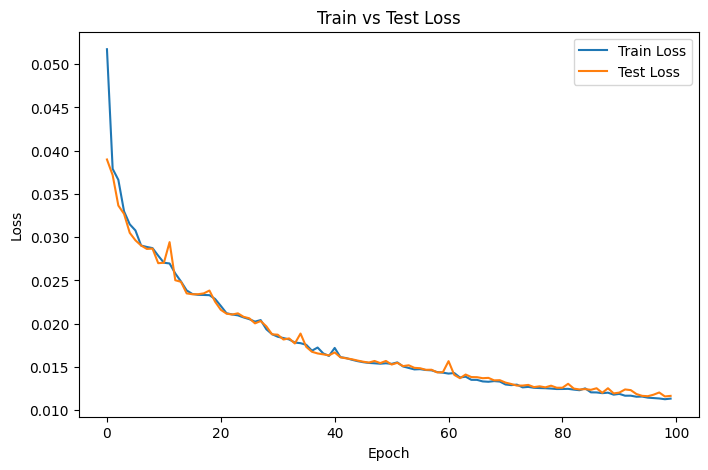

In [22]:
import torch
import matplotlib.pyplot as plt

epochs = 100
batch_size = 1024
model_2 = AE()
model_2.to(device)
loss_function = nn.MSELoss()
optimizer = optim.Adam(model_2.parameters(), lr=1e-3)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader = torch.utils.data.DataLoader(dataset=training_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

train_losses = []
test_losses = []

for epoch in range(epochs):
    model_2.train()
    train_loss = 0.0
    for images, _ in train_loader:
        images = images.view(-1, 3 * 32 * 32).to(device)
        reconstructed = model_2(images)
        loss = loss_function(reconstructed, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model_2.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, _ in test_loader:
            images = images.view(-1, 3 * 32 * 32).to(device)
            reconstructed = model_2(images)
            loss = loss_function(reconstructed, images)
            test_loss += loss.item()
    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.6f}")

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.show()

Jak widzimy wartosci straty dla danych testowych i danych treningowych, nie odbiegaja od siebie, wiec mozna wywnioskowac, ze nie wystepuje w tym modelu zjawisko overfitting lub undefittng.

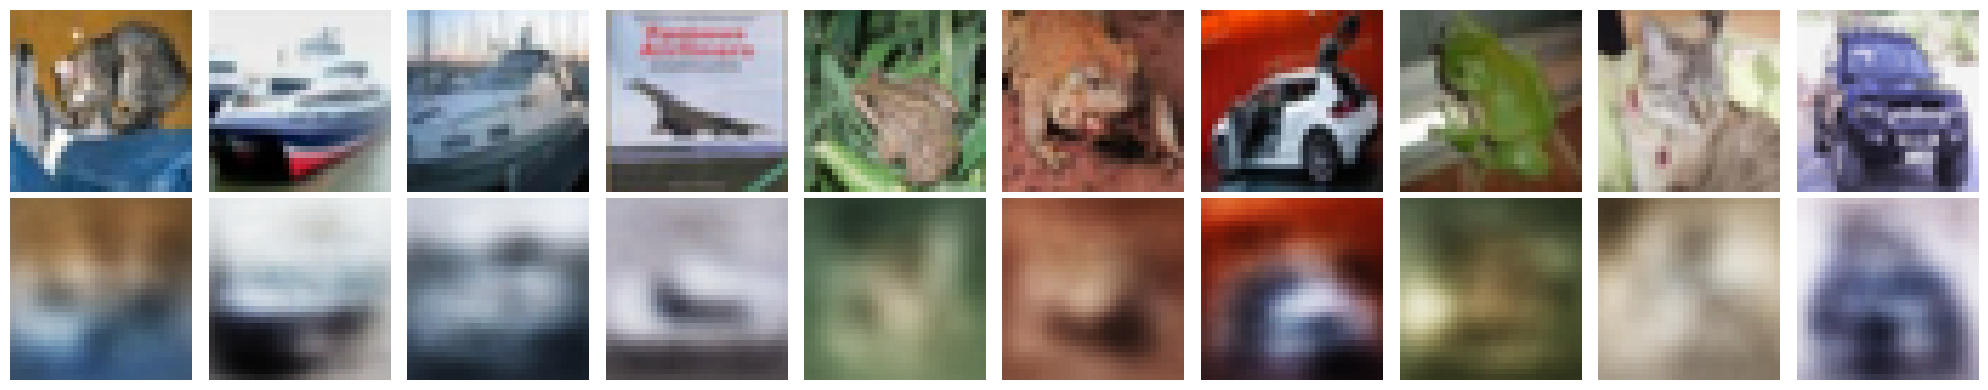

In [23]:
model_2.eval()
n = 10
test_iter = iter(test_loader)
images, _ = next(test_iter)
images = images[:n].to(device)
with torch.no_grad():
    reconstructed = model_2(images.view(-1, 3 * 32 * 32))
    reconstructed = reconstructed.view(-1, 3, 32, 32).cpu()

fig, axes = plt.subplots(2, n, figsize=(2 * n, 4))
for i in range(n):
    # Oryginał
    axes[0, i].imshow(images[i].cpu().permute(1, 2, 0))
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_ylabel('Oryginał', fontsize=14)
    # Rekonstrukcja
    axes[1, i].imshow(reconstructed[i].permute(1, 2, 0))
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_ylabel('Rekonstrukcja', fontsize=14)
plt.tight_layout()
plt.show()

6. Zbudować prosty klasyfikator wykorzystujący:
    - warstwę enkodującą do transformacji wejścia do wektora o rozmiarze 512 (ta warstwa nie będzie zmieniana podczas uczenia) 
    - dwie warstwy gęste: ostatnia z funkcją aktywacji softmax 
optimizer SGD, funkcja straty: CategoricalCrossentropy
Zbadać metrykę accuracy na zbiorze testowym  (ile obrazów zostało poprawnie zaklasyfikowanych) 

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

for param in model_2.encoder.parameters():
    param.requires_grad = False
# bo mamy juz wytrenowany model, dlatego nie chcemy update wag robic

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(512, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, len(classes))
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

classifier = Classifier().to(device)
optimizer = optim.Adam(classifier.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

def extract_features(dataloader):
    features = []
    labels = []
    model_2.eval()
    with torch.no_grad():
        for images, targets in dataloader:
            images = images.view(-1, 3*32*32).to(device)
            feats = model_2.encoder(images)
            features.append(feats.cpu())
            labels.append(targets)
    return torch.cat(features), torch.cat(labels).view(-1)

train_feats, train_labels = extract_features(train_loader)
test_feats, test_labels = extract_features(test_loader)

epochs = 100
for epoch in range(epochs):
    classifier.train()
    optimizer.zero_grad()
    outputs = classifier(train_feats.to(device))
    loss = loss_fn(outputs, train_labels.to(device))
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

classifier.eval()
with torch.no_grad():
    outputs = classifier(test_feats.to(device))
    preds = torch.argmax(outputs, dim=1)
    accuracy = (preds.cpu() == test_labels).float().mean().item()
    print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/100, Loss: 2.3027
Epoch 2/100, Loss: 2.3014
Epoch 3/100, Loss: 2.3001
Epoch 4/100, Loss: 2.2988
Epoch 5/100, Loss: 2.2975
Epoch 6/100, Loss: 2.2960
Epoch 7/100, Loss: 2.2944
Epoch 8/100, Loss: 2.2926
Epoch 9/100, Loss: 2.2907
Epoch 10/100, Loss: 2.2887
Epoch 11/100, Loss: 2.2865
Epoch 12/100, Loss: 2.2841
Epoch 13/100, Loss: 2.2815
Epoch 14/100, Loss: 2.2789
Epoch 15/100, Loss: 2.2760
Epoch 16/100, Loss: 2.2731
Epoch 17/100, Loss: 2.2700
Epoch 18/100, Loss: 2.2668
Epoch 19/100, Loss: 2.2635
Epoch 20/100, Loss: 2.2602
Epoch 21/100, Loss: 2.2569
Epoch 22/100, Loss: 2.2536
Epoch 23/100, Loss: 2.2503
Epoch 24/100, Loss: 2.2470
Epoch 25/100, Loss: 2.2437
Epoch 26/100, Loss: 2.2405
Epoch 27/100, Loss: 2.2373
Epoch 28/100, Loss: 2.2341
Epoch 29/100, Loss: 2.2309
Epoch 30/100, Loss: 2.2278
Epoch 31/100, Loss: 2.2247
Epoch 32/100, Loss: 2.2216
Epoch 33/100, Loss: 2.2185
Epoch 34/100, Loss: 2.2154
Epoch 35/100, Loss: 2.2124
Epoch 36/100, Loss: 2.2093
Epoch 37/100, Loss: 2.2063
Epoch 38/1

----------------------------------------------------------------------------------------

Zbudować autoenkoder wykorzystując zbiór CIFAR10

Podzielić zbiór na ciąg trenujący i uczący w proporcjach: 50000, 10000 (domyślne wartości w przypadku wykorzystania funkcji bibliotecznej  z pakietu tensorflow.keras.datasets.cifar10.load_data()

Zwizualizować 10-25 przykładów ze zbioru 
Wytrenować autoenkoder w wykorzystaniem warstw splotowych
warstwa kodująca powinna składać się z nie więcej niż  512 neuronów.

funkcja straty: błąd średniokowadratowy, optimizer SGD
liczba epok uczenia: 100, batch_size= 1024 
Zwizualizować 10-25 przykładów  obraz wejściowy - rekonstrukcja 

Zbudować prosty klasyfikator wykorzystujący:
 warstwę enkodującą do transformacji wejścia do wektora (ta warstwa nie będzie zmieniana podczas uczenia) 
dwie warstwy gęste: ostatnia z funkcją aktywacji softmax 
optimizer SGD, funkcja straty: CategoricalCrossentropy

Zbadać metrykę accuracy na zbiorze testowym  (ile obrazów zostało poprawnie zaklasyfikowanych) 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class ConvAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(128*4*4, 512),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(512, 128*4*4),
            nn.ReLU(),
            nn.Unflatten(1, (128, 4, 4)),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out

In [ ]:
batch_size = 1024
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader = torch.utils.data.DataLoader(dataset=training_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

model_conv = ConvAE().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model_conv.parameters(), lr=1e-2, momentum=0.9)
epochs = 100

train_losses, test_losses = [], []

for epoch in range(epochs):
    model_conv.train()
    train_loss = 0.0
    for images, _ in train_loader:
        images = images.to(device)
        outputs = model_conv(images)
        loss = loss_fn(outputs, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model_conv.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, _ in test_loader:
            images = images.to(device)
            outputs = model_conv(images)
            loss = loss_fn(outputs, images)
            test_loss += loss.item()
    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.6f}")

Epoch 1/100, Train Loss: 0.064094, Test Loss: 0.063632
Epoch 10/100, Train Loss: 0.062940, Test Loss: 0.062818
Epoch 20/100, Train Loss: 0.062924, Test Loss: 0.062817
Epoch 30/100, Train Loss: 0.062917, Test Loss: 0.062817
Epoch 40/100, Train Loss: 0.062917, Test Loss: 0.062816
Epoch 50/100, Train Loss: 0.062918, Test Loss: 0.062815
Epoch 60/100, Train Loss: 0.062913, Test Loss: 0.062814
Epoch 70/100, Train Loss: 0.062920, Test Loss: 0.062814
Epoch 80/100, Train Loss: 0.062915, Test Loss: 0.062813
Epoch 90/100, Train Loss: 0.062908, Test Loss: 0.062813
Epoch 100/100, Train Loss: 0.062916, Test Loss: 0.062812


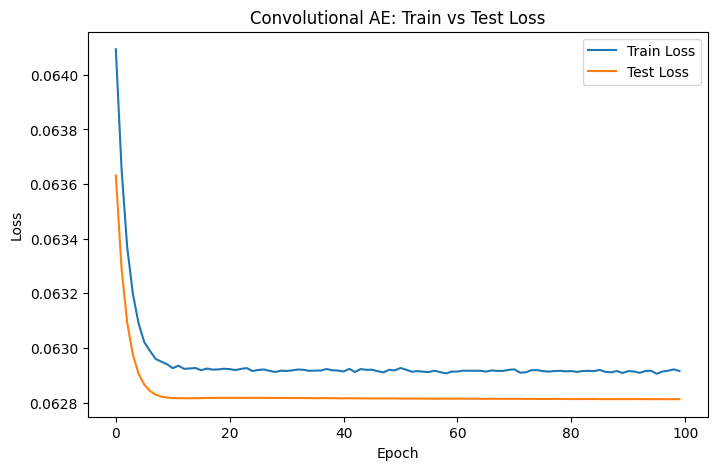

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Convolutional AE: Train vs Test Loss")
plt.legend()
plt.show()

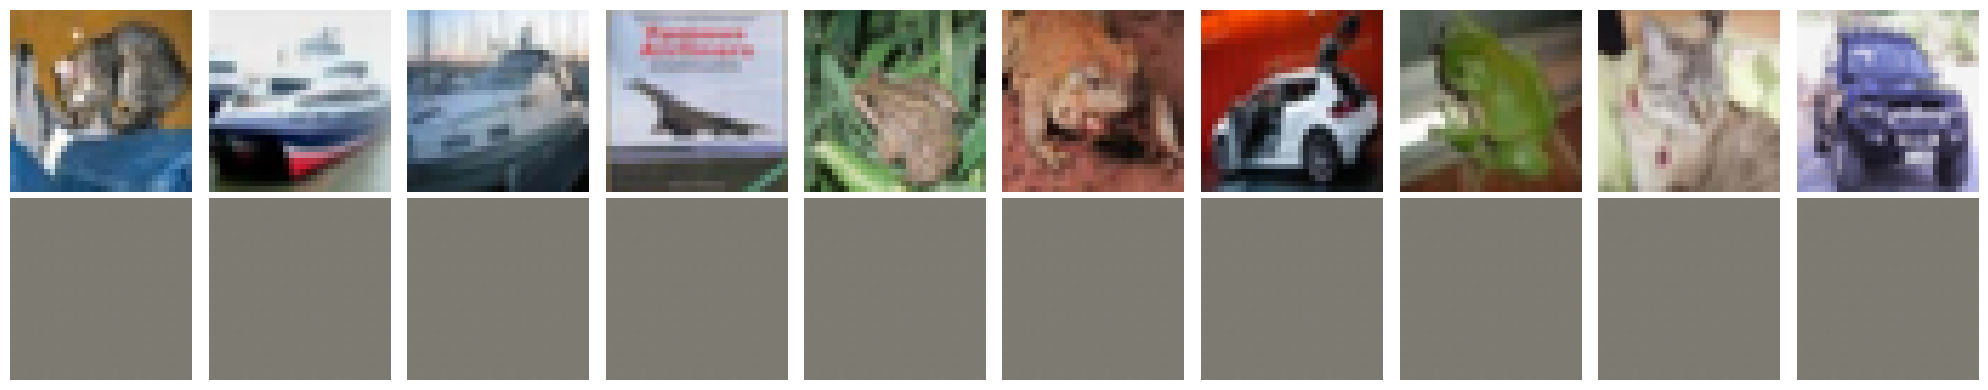

In [49]:
model_conv.eval()
n = 10
test_iter = iter(test_loader)
images, _ = next(test_iter)
images = images[:n].to(device)
with torch.no_grad():
    reconstructed = model_conv(images).cpu()

fig, axes = plt.subplots(2, n, figsize=(2 * n, 4))
for i in range(n):
    # Oryginał
    axes[0, i].imshow(images[i].cpu().permute(1, 2, 0))
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_ylabel('Oryginał', fontsize=14)
    # Rekonstrukcja
    axes[1, i].imshow(reconstructed[i].permute(1, 2, 0))
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_ylabel('Rekonstrukcja', fontsize=14)
plt.tight_layout()
plt.show()

Powtarza sie ta sama sytulacja, jak w przypadku autoencodera z wartwami dense. Wtedy rozwiazaniem okazalo sie uzycie optimizera Adam, z ta informacja przystepujemy do ponownego tworzenia modelu.

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim

for param in model_conv.encoder.parameters():
    param.requires_grad = False

class ConvClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.fc1 = nn.Linear(512, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

classifier = ConvClassifier(num_classes=10).to(device)
optimizer = optim.SGD(classifier.parameters(), lr=0.01, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()

@torch.no_grad()
def extract_conv_features(dataloader):
    features = []
    labels = []
    model_conv.eval()
    for images, targets in dataloader:
        images = images.to(device)
        feats = model_conv.encoder(images)
        features.append(feats.cpu())
        labels.append(targets)
    return torch.cat(features), torch.cat(labels).view(-1)

train_feats, train_labels = extract_conv_features(train_loader)
test_feats, test_labels = extract_conv_features(test_loader)

epochs = 50
for epoch in range(epochs):
    classifier.train()
    optimizer.zero_grad()
    outputs = classifier(train_feats.to(device))
    loss = loss_fn(outputs, train_labels.to(device))
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

classifier.eval()
with torch.no_grad():
    outputs = classifier(test_feats.to(device))
    preds = torch.argmax(outputs, dim=1)
    accuracy = (preds.cpu() == test_labels).float().mean().item()
    print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/50, Loss: 2.3026
Epoch 10/50, Loss: 2.3026
Epoch 10/50, Loss: 2.3026
Epoch 20/50, Loss: 2.3026
Epoch 20/50, Loss: 2.3026
Epoch 30/50, Loss: 2.3026
Epoch 30/50, Loss: 2.3026
Epoch 40/50, Loss: 2.3026
Epoch 40/50, Loss: 2.3026
Epoch 50/50, Loss: 2.3026
Test accuracy: 10.00%
Epoch 50/50, Loss: 2.3026
Test accuracy: 10.00%


In [51]:
batch_size = 1024
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
train_loader = torch.utils.data.DataLoader(dataset=training_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

model_conv_2 = ConvAE().to(device)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model_conv_2.parameters())
epochs = 100

train_losses, test_losses = [], []

for epoch in range(epochs):
    model_conv_2.train()
    train_loss = 0.0
    for images, _ in train_loader:
        images = images.to(device)
        outputs = model_conv_2(images)
        loss = loss_fn(outputs, images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model_conv_2.eval()
    test_loss = 0.0
    with torch.no_grad():
        for images, _ in test_loader:
            images = images.to(device)
            outputs = model_conv_2(images)
            loss = loss_fn(outputs, images)
            test_loss += loss.item()
    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Test Loss: {test_loss:.6f}")

Epoch 1/100, Train Loss: 0.047186, Test Loss: 0.031885
Epoch 10/100, Train Loss: 0.013091, Test Loss: 0.012515
Epoch 20/100, Train Loss: 0.009686, Test Loss: 0.009436
Epoch 30/100, Train Loss: 0.008273, Test Loss: 0.008056
Epoch 40/100, Train Loss: 0.007003, Test Loss: 0.007253
Epoch 50/100, Train Loss: 0.006164, Test Loss: 0.005918
Epoch 60/100, Train Loss: 0.005522, Test Loss: 0.006177
Epoch 70/100, Train Loss: 0.005273, Test Loss: 0.005110
Epoch 80/100, Train Loss: 0.004904, Test Loss: 0.004805
Epoch 90/100, Train Loss: 0.004586, Test Loss: 0.004406
Epoch 100/100, Train Loss: 0.004449, Test Loss: 0.004277


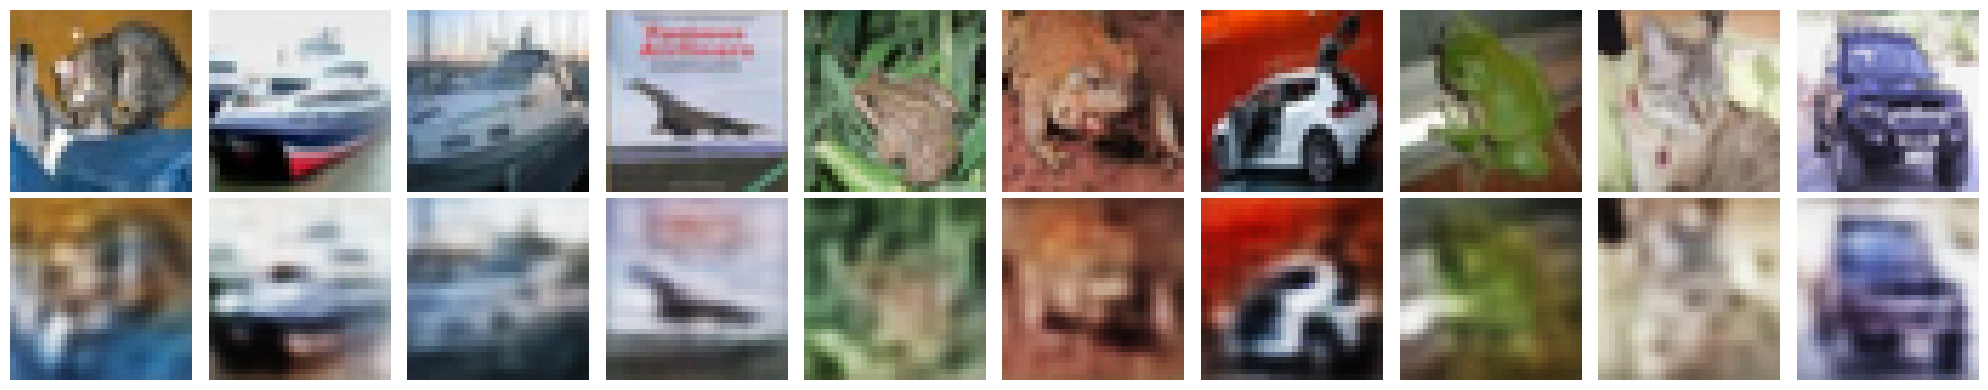

In [53]:
model_conv_2.eval()
n = 10
test_iter = iter(test_loader)
images, _ = next(test_iter)
images = images[:n].to(device)
with torch.no_grad():
    reconstructed = model_conv_2(images).cpu()

fig, axes = plt.subplots(2, n, figsize=(2 * n, 4))
for i in range(n):
    # Oryginał
    axes[0, i].imshow(images[i].cpu().permute(1, 2, 0))
    axes[0, i].axis('off')
    if i == 0:
        axes[0, i].set_ylabel('Oryginał', fontsize=14)
    # Rekonstrukcja
    axes[1, i].imshow(reconstructed[i].permute(1, 2, 0))
    axes[1, i].axis('off')
    if i == 0:
        axes[1, i].set_ylabel('Rekonstrukcja', fontsize=14)
plt.tight_layout()
plt.show()

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim

for param in model_conv_2.encoder.parameters():
    param.requires_grad = False

class ConvClassifier(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.fc1 = nn.Linear(512, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, num_classes)
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return self.softmax(x)

classifier = ConvClassifier(num_classes=10).to(device)
optimizer = optim.Adam(classifier.parameters())
loss_fn = nn.CrossEntropyLoss()

@torch.no_grad()
def extract_conv_features(dataloader):
    features = []
    labels = []
    model_conv_2.eval()
    for images, targets in dataloader:
        images = images.to(device)
        feats = model_conv_2.encoder(images)
        features.append(feats.cpu())
        labels.append(targets)
    return torch.cat(features), torch.cat(labels).view(-1)

train_feats, train_labels = extract_conv_features(train_loader)
test_feats, test_labels = extract_conv_features(test_loader)

epochs = 50
for epoch in range(epochs):
    classifier.train()
    optimizer.zero_grad()
    outputs = classifier(train_feats.to(device))
    loss = loss_fn(outputs, train_labels.to(device))
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0 or epoch == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

classifier.eval()
with torch.no_grad():
    outputs = classifier(test_feats.to(device))
    preds = torch.argmax(outputs, dim=1)
    accuracy = (preds.cpu() == test_labels).float().mean().item()
    print(f"Test accuracy: {accuracy*100:.2f}%")

Epoch 1/50, Loss: 2.3027
Epoch 10/50, Loss: 2.2196
Epoch 20/50, Loss: 2.1572
Epoch 30/50, Loss: 2.1227
Epoch 40/50, Loss: 2.1010
Epoch 50/50, Loss: 2.0847
Test accuracy: 38.09%
